In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pd_p
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing as pre
from sklearn.pipeline import Pipeline as pipe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import random
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OJ.csv')
data = data.drop(columns='Id')
data['Purchase'] = data['Purchase'].replace(['CH','MM'],[1,0])
data['Store7'] = data['Store7'].replace(['Yes','No'],[1,0])
data = data.drop('STORE',axis = 1)
data_dummy = pd.get_dummies(data)

In [3]:
def setup(data, target, split=0.7):
  from sklearn.model_selection import train_test_split
  X = data.drop(target,axis=1)
  y = data[target]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  #simple_logistic_model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [4]:
setup(data_dummy, 'Purchase')

In [5]:
def base_model(data_X=X_train, data_y=y_train, estimator=None, ensemble = False, method = 'Bagging', 
               fold=10, round=4, plot=None):
         
    
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.svm import LinearSVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold  
  from sklearn.model_selection import StratifiedKFold
  from sklearn.linear_model import RidgeClassifier
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  #from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
  from yellowbrick.classifier import roc_auc
  from yellowbrick.classifier import ROCAUC
  from yellowbrick.classifier import discrimination_threshold
  from yellowbrick.classifier import precision_recall_curve
  from yellowbrick.classifier import confusion_matrix
  from yellowbrick.classifier import class_prediction_error
  from yellowbrick.classifier import classification_report
    
  kf = StratifiedKFold(fold)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  avgs_auc =np.empty((0,0))
  avgs_acc =np.empty((0,0))
  avgs_recall =np.empty((0,0))
  avgs_precision =np.empty((0,0))
  avgs_f1 =np.empty((0,0))
  avgs_kappa =np.empty((0,0))
  
  global model, full_name
  
  if estimator == None:
    print("Please enter your custom model as on object or choose from model library. If you have previously defined the estimator, the output is generated using the same estimator") 
  elif estimator == 'lr':
    model = LogisticRegression(solver='lbfgs',max_iter=10000)
    full_name = 'Logistic Regression'
  elif estimator == 'knn':
    model = KNeighborsClassifier()
    full_name = 'K Nearest Neighbours'
  elif estimator == 'nb':
    model = GaussianNB()
    full_name = 'Naive Bayes'
  elif estimator == 'dt':
    model = DecisionTreeClassifier()
    full_name = 'Decision Tree'
  elif estimator == 'svm':
    model = SVC(probability=True,kernel='linear')
    full_name = 'Support Vector Machine'
  elif estimator == 'rbfsvm':
    model = SVC(gamma='auto', C=1, probability=True, kernel='rbf')
    full_name = 'RBF SVM'
  elif estimator == 'gpc':
    model = GaussianProcessClassifier()
    full_name = 'Gaussian Process Classifier'
  elif estimator == 'mlp':
    model = MLPClassifier(max_iter=500)
    full_name = 'Multi Level Perceptron'
  else:
    model = estimator
    full_name = "Custom Model"
  #pass
    
  #checking ensemble method
    
  if ensemble and method == 'Bagging':
    model = BaggingClassifier(model,bootstrap=True,n_estimators=10)
  elif ensemble and method == 'Boosting':
    model = AdaBoostClassifier(model)
  elif method == 'Boosting':
    model = AdaBoostClassifier(model)
  #else:
    #model = model
    
  for train_i , test_i in kf.split(data_X,data_y):
  #print("TRAIN:", train_i, "TEST:", test_i)
    
    Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
    ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
    
    model.fit(Xtrain,ytrain)
    pred_prob = model.predict_proba(Xtest)
    pred_prob = pred_prob[:,1]
    pred_ = model.predict(Xtest)
    sca = metrics.accuracy_score(ytest,pred_)
    sc = metrics.roc_auc_score(ytest,pred_prob)
    recall = metrics.recall_score(ytest,pred_)
    precision = metrics.average_precision_score(ytest,pred_prob)
    kappa = cohen_kappa_score(ytest,pred_)
    f1 = metrics.f1_score(ytest,pred_)
    score_acc = np.append(score_acc,sca)
    score_auc = np.append(score_auc,sc)
    score_recall = np.append(score_recall,recall)
    score_precision = np.append(score_precision,precision)
    score_f1 =np.append(score_f1,f1)
    score_kappa =np.append(score_kappa,kappa)
     
  mean_acc=np.mean(score_acc)
  mean_auc=np.mean(score_auc)
  mean_recall=np.mean(score_recall)
  mean_precision=np.mean(score_precision)
  mean_f1=np.mean(score_f1)
  mean_kappa=np.mean(score_kappa)
  std_acc=np.std(score_acc)
  std_auc=np.std(score_auc)
  std_recall=np.std(score_recall)
  std_precision=np.std(score_precision)
  std_f1=np.std(score_f1)
  std_kappa=np.std(score_kappa)
    
  avgs_acc = np.append(avgs_acc, mean_acc)
  avgs_acc = np.append(avgs_acc, std_acc) 
  avgs_auc = np.append(avgs_auc, mean_auc)
  avgs_auc = np.append(avgs_auc, std_auc)
  avgs_recall = np.append(avgs_recall, mean_recall)
  avgs_recall = np.append(avgs_recall, std_recall)
  avgs_precision = np.append(avgs_precision, mean_precision)
  avgs_precision = np.append(avgs_precision, std_precision)
  avgs_f1 = np.append(avgs_f1, mean_f1)
  avgs_f1 = np.append(avgs_f1, std_f1)
  avgs_kappa = np.append(avgs_kappa, mean_kappa)
  avgs_kappa = np.append(avgs_kappa, std_kappa)
  
  global base_model_, base_model_unpivot_
      
  base_model_ = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
  base_model_unpivot_ = pd.melt(base_model_,value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa'])
  base_model_unpivot_.columns = ['Metric', 'Measure']
  base_model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
  base_model_ = base_model_.append(base_model_avgs)
  base_model_ = base_model_.round(round)  
  #return base_model_
  #global base_model_auc
  #base_model_auc = roc_auc(model, X_train, y_train)
  
  if plot == 'None':
    from IPython.display import display, HTML
    display(HTML(base_model_.to_html()))
    
  elif plot == 'auc':
    from yellowbrick.classifier import ROCAUC
    visualizer = ROCAUC(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    
  elif plot == 'threshold':
    #visualizer = discrimination_threshold(model, X_train, y_train)
    from yellowbrick.classifier import DiscriminationThreshold
    visualizer = DiscriminationThreshold(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    
  elif plot == 'pr':
    #visualizer = precision_recall_curve(model, X_train, y_train)
    from yellowbrick.classifier import PrecisionRecallCurve
    visualizer = PrecisionRecallCurve(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    
  elif plot == 'confusion_matrix':
    #visualizer = confusion_matrix(model, X_train, y_train, cmap="Greens", fontsize=25)
    from yellowbrick.classifier import ConfusionMatrix
    visualizer = ConfusionMatrix(model, fontsize=20, cmap="Greens")
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    
  elif plot == 'error':
    #visualizer = class_prediction_error(model, X_train, y_train)
    from yellowbrick.classifier import ClassPredictionError
    visualizer = ClassPredictionError(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
        
  elif plot == 'class_report':
    #visualizer = classification_report(model, X_train, y_train)
    from yellowbrick.classifier import ClassificationReport
    visualizer = ClassificationReport(model, support=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()

  #elif plot == 'tree':
    
    #from sklearn import tree
    #from sklearn.tree import plot_tree
    #from sklearn.tree import DecisionTreeClassifier, plot_tree
    #model = tree.DecisionTreeClassifier()
    #model = model.fit(X_train, y_train)
    #plot_tree(model.fit(X_train, y_train))
    
  elif plot == 'boundary':
        
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from yellowbrick.contrib.classifier import DecisionViz        
    
    #global X_train, X_test, y_train, y_test
    X_train_transformed = X_train.select_dtypes(include='float64')
    X_test_transformed = X_test.select_dtypes(include='float64')
    X_train_transformed = StandardScaler().fit_transform(X_train_transformed)
    X_test_transformed = StandardScaler().fit_transform(X_test_transformed)
    pca = PCA(n_components=2)
    X_train_transformed = pca.fit_transform(X_train_transformed)
    X_test_transformed = pca.fit_transform(X_test_transformed)

    y_train_transformed = np.array(y_train)
    y_test_transformed = np.array(y_test)

    viz = DecisionViz(model)
    viz.fit(X_train_transformed, y_train_transformed, features=['Feature One', 'Feature Two'], classes=['A', 'B'])
    viz.draw(X_test_transformed, y_test_transformed)
    viz.poof()    
    
  elif plot == 'learning':
    from yellowbrick.model_selection import LearningCurve
    cv = fold
    sizes = np.linspace(0.3, 1.0, 10)  
    visualizer = LearningCurve(model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X_train, y_train)
    visualizer.poof()
    
  elif plot == 'rfe':
    from yellowbrick.model_selection import RFECV    
    visualizer = RFECV(model, cv=fold)
    visualizer.fit(X_train, y_train)
    visualizer.poof()

  elif plot == 'manifold':
    from yellowbrick.features import Manifold
    X_train_transformed = X_train.select_dtypes(include='float64') 
    visualizer = Manifold(manifold="tsne")
    visualizer.fit_transform(X_train_transformed, y_train)
    visualizer.poof()
    
  elif plot == 'vc':
    
    if estimator == 'dt':
       
        from yellowbrick.model_selection import ValidationCurve
        viz = ValidationCurve(model, param_name="max_depth", param_range=np.arange(1,11), scoring='f1_weighted',cv=fold)
        viz.fit(X_train, y_train)
        viz.poof()
        
    elif estimator == 'svm':
        pass
    
        #from yellowbrick.model_selection import ValidationCurve
        #viz = ValidationCurve(model, param_name="C", param_range=np.arange(1,5), scoring='f1_weighted',cv=fold)
        #viz.fit(X_train, y_train)
        #viz.poof()

  elif plot == 'dimension':
    
    from yellowbrick.features import RadViz
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    
    X_train_transformed = X_train.select_dtypes(include='float64') 
    X_train_transformed = StandardScaler().fit_transform(X_train_transformed)
    y_train_transformed = np.array(y_train)
    
    pca = PCA(n_components=5)
    X_train_transformed = pca.fit_transform(X_train_transformed)
    
    classes = ["1", "0"]
    visualizer = RadViz(classes=classes)
    visualizer.fit(X_train_transformed, y_train_transformed)           # Fit the data to the visualizer
    visualizer.transform(X_train_transformed)        # Transform the data
    visualizer.poof()              # Draw/show/poof the data
        
  elif plot == 'calibration':
    
    from sklearn.calibration import calibration_curve
    
    plt.figure(figsize=(7, 6))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    model.fit(X_train, y_train)
    prob_pos = model.predict_proba(X_test)[:, 1]
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s" % (full_name, ))

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([0, 1])
    ax1.set_xlim([0, 1])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')
    ax1.set_facecolor('white')
    ax1.grid(b=True, color='grey', linewidth=0.5, linestyle = '-')
    plt.tight_layout()
    plt.show()   
        
  elif plot == 'feature':
    #visualizer = confusion_matrix(model, X_train, y_train, cmap="Greens", fontsize=25)        
    #from IPython.display import display, HTML
    #display(HTML(base_model_.to_html()))
    variables = abs(model.coef_[0])
    col_names = np.array(X_train.columns)
    coef_df = pd.DataFrame({'Variable': X_train.columns, 'Value': variables})
    sorted_df = coef_df.sort_values(by='Value')
    my_range=range(1,len(sorted_df.index)+1)
    plt.figure(figsize=(8,5))
    plt.hlines(y=my_range, xmin=0, xmax=sorted_df['Value'], color='skyblue')
    plt.plot(sorted_df['Value'], my_range, "o")
    plt.yticks(my_range, sorted_df['Variable'])
    plt.title("Feature Importance Plot")
    plt.xlabel('Variable Importance')
    plt.ylabel('Features') 
    global var_imp_array_top_n
    var_imp = sorted_df.reset_index(drop=True)
    var_imp_array = np.array(var_imp['Variable'])
    var_imp_array_top_n = var_imp_array[0:len(var_imp_array)]

  elif plot == 'cv':
    sns.set(rc={'figure.figsize':(8,5)})
    sns.boxplot(x='Metric', y='Measure', data=base_model_unpivot_, width=0.5, linewidth=1, palette='Set2').set_title('Results from K-Fold Cross Validation')
    
  else:
    from IPython.display import display, HTML
    display(HTML(base_model_.to_html()))
    #global base_model_plot

In [6]:
def optimize_model(data_X=X_train, n=3):
    global X_train
    drop_list = var_imp_array_top_n[0:n]
    X_train.drop(drop_list, axis=1, inplace=True)
    #X_test.drop(drop_list, axis=1)

In [151]:
#compare_models() function

def compare_models(data_X=X_train, data_y=y_train, fold=10, round=4, sort='Accuracy', plot=False, ensemble=False, 
                   method='Bagging'):

  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.ensemble import BaggingClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  import random
  import pandas.io.formats.style

  lr = LogisticRegression(solver='lbfgs',max_iter=10000)
  knn = KNeighborsClassifier()
  nb = GaussianNB()
  dt = DecisionTreeClassifier()
  svm = SVC(probability=True,kernel='linear')
  rbfsvm = SVC(gamma='auto', C=1, probability=True, kernel='rbf')
  gpc = GaussianProcessClassifier()
  mlp = MLPClassifier(max_iter=500)

  if ensemble and method == 'Bagging':
    lr = BaggingClassifier(lr,bootstrap=True,n_estimators=10)    
    knn = BaggingClassifier(knn,bootstrap=True,n_estimators=10)
    nb = BaggingClassifier(nb,bootstrap=True,n_estimators=10)
    dt = RandomForestClassifier(n_estimators=10) #default will change to 100 in new version of sklearn
    svm = BaggingClassifier(svm,bootstrap=True,n_estimators=10)
    rbfsvm = BaggingClassifier(rbfsvm,bootstrap=True,n_estimators=10)
    gpc = BaggingClassifier(gpc,bootstrap=True,n_estimators=10)
    mlp = BaggingClassifier(mlp,bootstrap=True,n_estimators=10)
     
  elif ensemble and method == 'Boosting':
    lr = AdaBoostClassifier(lr)
    knn = knn
    nb = AdaBoostClassifier(nb)
    dt = GradientBoostingClassifier()
    svm = AdaBoostClassifier(svm)
    rbfsvm = AdaBoostClassifier(rbfsvm)
    gpc = gpc
    mlp = mlp
  
  else:
    lr = LogisticRegression(solver='lbfgs',max_iter=10000)
    knn = KNeighborsClassifier()
    nb = GaussianNB()
    dt = DecisionTreeClassifier()
    svm = SVC(probability=True,kernel='linear')
    rbfsvm = SVC(gamma='auto', C=1, probability=True, kernel='rbf')
    gpc = GaussianProcessClassifier()
    mlp = MLPClassifier(max_iter=500)

  model_library = list([lr, knn, nb, dt, svm, rbfsvm, gpc, mlp])

  kf = StratifiedKFold(fold)

  score_acc =np.empty((0,0))
  score_auc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  global score_acc_running
  score_acc_running = np.empty((0,0)) ##running total
  avg_acc = np.empty((0,0))
  avg_auc = np.empty((0,0))
  avg_recall = np.empty((0,0))
  avg_precision = np.empty((0,0))
  avg_f1 = np.empty((0,0))
  avg_kappa = np.empty((0,0))
      
  for model in model_library:
    
    for train_i , test_i in kf.split(data_X,data_y):
     
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.average_precision_score(ytest,pred_prob)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        score_acc_running = np.append(score_acc_running,sca)
    avg_acc = np.append(avg_acc,np.mean(score_acc))
    avg_auc = np.append(avg_auc,np.mean(score_auc))
    avg_recall = np.append(avg_recall,np.mean(score_recall))
    avg_precision = np.append(avg_precision,np.mean(score_precision))
    avg_f1 = np.append(avg_f1,np.mean(score_f1))
    avg_kappa = np.append(avg_kappa,np.mean(score_kappa))
    score_acc =np.empty((0,0))
    score_auc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
  
  model_list = ['Logistic Regression', 'K Nearest Neighbours', 'Gaussian Naive Bayes',
                           'Decision Tree', 'Support Vector Machine - Linear', 'Support Vector Machine - RBF',
                           'Gaussian Process Classifier', 'Neural Net - Multi Level Perceptron']
  
  model_list_short = ['LR', 'KNN', 'NB', 'DT', 'SVM-L', 'SVM-RBF','GPC', 'NN-MLP']    
  model_list_repeat = np.repeat(model_list_short, fold)

  compare_models_unpivot = pd.DataFrame({'Model': model_list_repeat, 'Accuracy':score_acc_running}) #accuracy hardcoded
  
  global compare_models_
  
  def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

  compare_models_ = pd.DataFrame({'Model':model_list, 'Accuracy':avg_acc, 'AUC':avg_auc, 
                     'Recall':avg_recall, 'Prec.':avg_precision, 
                     'F1':avg_f1, 'Kappa': avg_kappa}).round(round).sort_values(by=[sort], 
                      ascending=False).reset_index(drop=True).style.apply(highlight_max,subset=['Accuracy','AUC','Recall',
                      'Prec.','F1','Kappa'])
  compare_models_ = compare_models_.set_properties(**{'text-align': 'left'})
  compare_models_ = compare_models_.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
                  
  if plot:
    display(compare_models_)
    sns.set(rc={'figure.figsize':(8.7,5.7)})
    sns.boxplot(x='Model', y='Accuracy', data=compare_models_unpivot, width=0.5, linewidth=1, palette='Set2').set_title('Models Accuracy Comparison on Cross Validation') 
    #accuracy hardcdoded
  else:  
    return compare_models_

In [92]:
def tune_model(data_X=X_train, data_y=y_train, estimator=None, fold=10, round=4, n_iter=10, optimize='accuracy',
              ensemble = False, method = 'Bagging', random_state=None):
    
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold  
  from sklearn.model_selection import StratifiedKFold
  from sklearn.linear_model import RidgeClassifier
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
    
  kf = StratifiedKFold(fold)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  avgs_auc =np.empty((0,0))
  avgs_acc =np.empty((0,0))
  avgs_recall =np.empty((0,0))
  avgs_precision =np.empty((0,0))
  avgs_f1 =np.empty((0,0))
  avgs_kappa =np.empty((0,0))
  
  global best_model, best_model_param
    
  if estimator == 'knn':
    
    param_grid = {'n_neighbors': range(1,51),
             'weights' : ['uniform', 'distance'],
             'metric':["euclidean", "manhattan"]
                 }        
    model_grid = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_grid, 
                                    scoring=optimize, n_iter=n_iter, cv=fold, random_state=random_state,
                                   n_jobs=-1, iid=False)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
 
  elif estimator == 'lr':

    param_grid = {'C': [1,5,10,25,50,100],
              "penalty": [ 'l1', 'l2'],
              "class_weight": ["balanced", None]
                 }
    model_grid = RandomizedSearchCV(estimator=LogisticRegression(solver='liblinear', max_iter=10000), param_distributions=param_grid, 
                                    scoring=optimize, n_iter=n_iter, cv=fold, random_state=random_state, iid=False,
                                   n_jobs=-1)
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
 
  elif estimator == 'dt':
        
    param_grid = {"max_depth": np.random.randint(3, (len(X_train.columns)*.85),4),
              "max_features": np.random.randint(3, len(X_train.columns),4),
              "min_samples_leaf": [2,3,4],
              "criterion": ["gini", "entropy"]}
    
    model_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=param_grid,
                                   scoring=optimize, n_iter=n_iter, cv=fold, random_state=random_state,
                                   iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
 
  elif estimator == 'mlp':
    
    param_grid = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
             'solver' : ['lbfgs', 'sgd', 'adam'],
             'alpha': [0.0001, 0.05],
             'hidden_layer_sizes': np.random.randint(5,15,5),
             'activation': ["tanh", "identity", "logistic","relu"]
             }
   
    model_grid = RandomizedSearchCV(estimator=MLPClassifier(max_iter=1000), param_distributions=param_grid,
                                   scoring=optimize, n_iter=n_iter, cv=fold, random_state=random_state, iid=False,
                                   n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
    
  elif estimator == 'gpc':
    
    param_grid = {"max_iter_predict":[100,200,300,400,500,600,700,800,900,1000]}
   
    model_grid = RandomizedSearchCV(estimator=GaussianProcessClassifier(), param_distributions=param_grid,
                                   scoring=optimize, n_iter=n_iter, cv=fold, random_state=random_state,
                                   n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    
    
  elif estimator == 'rbfsvm':

    param_grid = {'C': [.5,1,10,50,100],
            "class_weight": ["balanced", None]}
    
    model_grid = RandomizedSearchCV(estimator=SVC(gamma='auto', C=1, probability=True, kernel='rbf'), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=random_state, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    

    
  elif estimator == 'nb':

    param_grid = {'var_smoothing': [0.000000001, 0.0000001, 0.00001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007,
                                    0.008, 0.009, 0.01, 0.1, 1]}
    
    model_grid = RandomizedSearchCV(estimator=GaussianNB(), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=random_state, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_        
    

  elif estimator == 'svm':

    #param_grid = {'penalty': ['l2'],'loss' : ['squared_hinge'],
    #              'C' : [1,5,10,15,25,50,100],'class_weight' : ['balanced', None]
    #             }
    
    #model_grid = RandomizedSearchCV(estimator=LinearSVC(), 
    #                               param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
    #                                cv=fold, random_state=random_state, n_jobs=-1)
    
    import colorama
    from colorama import Fore, Back, Style
    exception = "EXCEPTION RAISED: Linear SVM tuning is not supported. The results generated below are using default parameters of SVM." 
    print(Fore.RED + exception)
    model_grid = SVC(probability=True,kernel='linear')
    model_grid.fit(X_train,y_train)
    model = model_grid #.best_estimator_
    best_model = model_grid #.best_estimator_
    #best_model_param = model_grid     

    
  if estimator == 'dt' and ensemble == True and method == 'Bagging':
    
    #when using normal BaggingClassifier() DT estimator raise's an exception for max_features parameter. Hence a separate 
    #call has been made for estimator='dt' and method = 'Bagging'. Boosting works fine.
    
    param_grid = {'n_estimators': [10,15,20,25,30],
                 'max_samples': [0.3,0.5,0.6,0.7,0.8,0.9],
                 #'max_features':[0.3,0.5,0.6,0.7,0.8,0.9],
                 #'max_features':[1,2,3,5,6,8,10],
                 'bootstrap': [True, False],
                 'bootstrap_features': [True, False],
                 }

    best_model = BaggingClassifier(best_model)
    
    model_grid = RandomizedSearchCV(estimator=best_model, 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=random_state, iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    
  
  elif estimator == 'svm' and ensemble == True and method == 'Bagging':
    #cannot tune SVM Linear. There is no grid as such. Hence same is repeated where method = 'Bagging'
    #import colorama
    #from colorama import Fore, Back, Style
    #exception = "EXCEPTION RAISED: Linear SVM tuning is not supported. The results generated below are using default parameters of SVM." 
    #print(Fore.RED + exception)
    model_grid = SVC(probability=True,kernel='linear')
    model_grid.fit(X_train,y_train)
    model = model_grid #.best_estimator_
    best_model = model_grid #.best_estimator_

  elif estimator == 'svm' and ensemble == True and method == 'Boosting':
    #cannot tune SVM Linear. There is no grid as such. Hence same is repeated where method = 'Boosting'
    #import colorama
    #from colorama import Fore, Back, Style
    #exception = "EXCEPTION RAISED: Linear SVM tuning is not supported. The results generated below are using default parameters of SVM." 
    #print(Fore.RED + exception)
    model_grid = SVC(probability=True,kernel='linear')
    model_grid.fit(X_train,y_train)
    model = model_grid #.best_estimator_
    best_model = model_grid #.best_estimator_

  elif ensemble and method == 'Bagging':
    
    param_grid = {'n_estimators': [10,15,20,25,30],
                 'max_samples': [0.3,0.5,0.6,0.7,0.8,0.9],
                 'max_features':[0.3,0.5,0.6,0.7,0.8,0.9],
                 #'max_features':[1,2,3,5,6,8,10],
                 'bootstrap': [True, False],
                 'bootstrap_features': [True, False],
                 }

    best_model = BaggingClassifier(best_model)
    
    model_grid = RandomizedSearchCV(estimator=best_model, 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=random_state, iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    
  
      
  elif ensemble and method =='Boosting':
        
    param_grid = {'n_estimators': [25,35,50,60,70,75],
                 'learning_rate': [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2],
                 }        
    
    best_model = AdaBoostClassifier(best_model)
    
    model_grid = RandomizedSearchCV(estimator=best_model, 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=random_state, iid=False, n_jobs=-1)

  #else:
    #pass
     
  for train_i , test_i in kf.split(data_X,data_y):
    
    Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
    ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
    
    model.fit(Xtrain,ytrain)
    pred_prob = model.predict_proba(Xtest)
    pred_prob = pred_prob[:,1]
    pred_ = model.predict(Xtest)
    sca = metrics.accuracy_score(ytest,pred_)
    sc = metrics.roc_auc_score(ytest,pred_prob)
    recall = metrics.recall_score(ytest,pred_)
    precision = metrics.average_precision_score(ytest,pred_prob)
    kappa = cohen_kappa_score(ytest,pred_)
    f1 = metrics.f1_score(ytest,pred_)
    score_acc = np.append(score_acc,sca)
    score_auc = np.append(score_auc,sc)
    score_recall = np.append(score_recall,recall)
    score_precision = np.append(score_precision,precision)
    score_f1 =np.append(score_f1,f1)
    score_kappa =np.append(score_kappa,kappa)
     
  mean_acc=np.mean(score_acc)
  mean_auc=np.mean(score_auc)
  mean_recall=np.mean(score_recall)
  mean_precision=np.mean(score_precision)
  mean_f1=np.mean(score_f1)
  mean_kappa=np.mean(score_kappa)
  std_acc=np.std(score_acc)
  std_auc=np.std(score_auc)
  std_recall=np.std(score_recall)
  std_precision=np.std(score_precision)
  std_f1=np.std(score_f1)
  std_kappa=np.std(score_kappa)
    
  avgs_acc = np.append(avgs_acc, mean_acc)
  avgs_acc = np.append(avgs_acc, std_acc) 
  avgs_auc = np.append(avgs_auc, mean_auc)
  avgs_auc = np.append(avgs_auc, std_auc)
  avgs_recall = np.append(avgs_recall, mean_recall)
  avgs_recall = np.append(avgs_recall, std_recall)
  avgs_precision = np.append(avgs_precision, mean_precision)
  avgs_precision = np.append(avgs_precision, std_precision)
  avgs_f1 = np.append(avgs_f1, mean_f1)
  avgs_f1 = np.append(avgs_f1, std_f1)
  avgs_kappa = np.append(avgs_kappa, mean_kappa)
  avgs_kappa = np.append(avgs_kappa, std_kappa)
  
  global tune_model_
      
  tune_model_ = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
  #tune_model_unpivot_ = pd.melt(tune_model_,value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa'])
  #tune_model_unpivot_.columns = ['Metric', 'Measure']
  tune_model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
  tune_model_ = tune_model_.append(tune_model_avgs)
  tune_model_ = tune_model_.round(round)

  return tune_model_
  #return best_model

In [9]:
def blend_models(data_X=X_train, data_y=y_train, fold=10, round=4, sort='Accuracy'):
  
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
  from sklearn.ensemble import VotingClassifier

  kf = StratifiedKFold(fold)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  #avgs_auc =np.empty((0,0))
  #avgs_acc =np.empty((0,0))
  #avgs_recall =np.empty((0,0))
  #avgs_precision =np.empty((0,0))
  #avgs_f1 =np.empty((0,0))
  #avgs_kappa =np.empty((0,0))
  avg_acc = np.empty((0,0))
  avg_auc = np.empty((0,0))
  avg_recall = np.empty((0,0))
  avg_precision = np.empty((0,0))
  avg_f1 = np.empty((0,0))
  avg_kappa = np.empty((0,0))
  
  lr = LogisticRegression(solver='lbfgs',max_iter=10000)
  knn = KNeighborsClassifier()
  nb = GaussianNB()
  dt = DecisionTreeClassifier()
  svm = SVC(probability=True,kernel='linear')
  rbfsvm = SVC(gamma='auto', C=1, probability=True, kernel='rbf')
  gpc = GaussianProcessClassifier()
  mlp = MLPClassifier(max_iter=500)
  
  #comb = [('lr',lr),('knn', knn),('nb', nb)]
  comb = [[('lr',lr),('knn', knn),('nb', nb), ('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc)],
          [('lr',lr),('knn', knn),('nb', nb), ('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('mlp', mlp)],
          [('lr',lr),('knn', knn),('nb', nb), ('dt', dt), ('svm', svm), ('gpc', gpc), ('mlp', mlp)],
          [('lr',lr),('knn', knn),('nb', nb), ('dt', dt), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)],
          [('lr',lr),('knn', knn),('nb', nb), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)],
          [('lr',lr),('knn', knn),('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)],
          [('lr',lr),('nb', nb),('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)],
          [('knn',knn),('nb', nb),('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)]]
    
  for i in comb:
    model = VotingClassifier(estimators=i, voting='soft', n_jobs=-1)
  
    for train_i , test_i in kf.split(data_X,data_y):
        
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.average_precision_score(ytest,pred_prob)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        #score_acc_running = np.append(score_acc_running,sca)
    avg_acc = np.append(avg_acc,np.mean(score_acc))
    avg_auc = np.append(avg_auc,np.mean(score_auc))
    avg_recall = np.append(avg_recall,np.mean(score_recall))
    avg_precision = np.append(avg_precision,np.mean(score_precision))
    avg_f1 = np.append(avg_f1,np.mean(score_f1))
    avg_kappa = np.append(avg_kappa,np.mean(score_kappa))
    score_acc =np.empty((0,0))
    score_auc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
  
  model_list = ['LR + KNN + NB + DT + SVM + SVM-RBF + GPC', 
                'LR + KNN + NB + DT + SVM + SVM-RBF + MLP', 
                'LR + KNN + NB + DT + SVM + GPC + MLP',
                'LR + KNN + NB + DT + SVM-RBF + GPC + MLP',
                'LR + KNN + NB + SVM + SVM-RBF + GPC + MLP',
                'LR + KNN + DT + SVM + SVM-RBF + GPC + MLP',                
                'LR + NB + DT + SVM + SVM-RBF + GPC + MLP',                
                'KNN + NB + DT + SVM + SVM-RBF + GPC + MLP']
                      
  #model_list_short = ['LR', 'KNN', 'NB', 'DT', 'SVM-L', 'SVM-RBF','GPC', 'NN-MLP']    
  #model_list_repeat = np.repeat(model_list_short, fold)

  #compare_models_unpivot = pd.DataFrame({'Model': model_list_repeat, 'Accuracy':score_acc_running}) #accuracy hardcoded
  
  global blend_models_
  
  def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

  blend_models_ = pd.DataFrame({'Model':model_list, 'Accuracy':avg_acc, 'AUC':avg_auc, 'Recall':avg_recall, 'Precision':avg_precision, 'F1':avg_f1, 'Kappa': avg_kappa}).round(round).sort_values(by=[sort], ascending=False).reset_index(drop=True).style.apply(highlight_max,subset=['Accuracy','AUC','Recall','Precision','F1','Kappa'])
  blend_models_ = blend_models_.set_properties(**{'text-align': 'left'})
  blend_models_ = blend_models_.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

  display(blend_models_)
    #sns.set(rc={'figure.figsize':(8.7,5.27)})
    #sns.boxplot(x='Model', y='Accuracy', data=compare_models_unpivot, width=0.5, linewidth=1, palette='Set2').set_title('Models Accuracy Comparison on Cross Validation') 
    #accuracy hardcdoded


In [147]:
def stack_models(estimator_list, meta_model = 'meta_model', round = 4, fold = 10, method = 'soft', restack=False):
    
    #Capturing the method of stacking required by user. method='soft' means 'predict_proba' else 'predict'
    
    if method == 'soft':
        predict_method = 'predict_proba'
    elif method == 'hard':
        predict_method = 'predict'
    
    #Defining meta model. Logistic Regression hardcoded for now
    meta_model = LogisticRegression(solver='lbfgs', max_iter=10000)
    
    #declare global for testing purpose. DONOT REMOVE //////
    global base_prediction
    
    base_array = np.zeros((0,0))
    base_prediction = pd.DataFrame(y_train)
    base_prediction = base_prediction.reset_index(drop=True)
    
    for model in estimator_list:
        base_array = cross_val_predict(model,X_train,y_train,cv=fold, method=predict_method)
        if method == 'soft':
            base_array = base_array[:,1]
        elif method == 'hard':
            base_array = base_array
        base_array_df = pd.DataFrame(base_array)
        base_prediction = pd.concat([base_prediction,base_array_df],axis=1)
        base_array = np.empty((0,0))
    
    #defining data_X and data_y dataframe to be used in next stage.
    
    #global data_X #for testing only 
    
    if restack:
        data_X_ = X_train
        data_X_ = data_X_.reset_index(drop=True)
        data_X = base_prediction.drop(base_prediction.columns[0],axis=1)
        data_X = pd.concat([data_X_,data_X],axis=1)
        
    elif restack == False:
        data_X = base_prediction.drop(base_prediction.columns[0],axis=1)
    
    data_y = base_prediction[base_prediction.columns[0]]
    
    #Meta Modeling Starts Here
    
    model = meta_model #this defines model to be used below as model = meta_model (as captured above)

    kf = StratifiedKFold(fold) #capturing fold requested by user

    score_auc =np.empty((0,0))
    score_acc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
    avgs_auc =np.empty((0,0))
    avgs_acc =np.empty((0,0))
    avgs_recall =np.empty((0,0))
    avgs_precision =np.empty((0,0))
    avgs_f1 =np.empty((0,0))
    avgs_kappa =np.empty((0,0))
    
    for train_i , test_i in kf.split(data_X,data_y):
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]

        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.average_precision_score(ytest,pred_prob)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
     
    mean_acc=np.mean(score_acc)
    mean_auc=np.mean(score_auc)
    mean_recall=np.mean(score_recall)
    mean_precision=np.mean(score_precision)
    mean_f1=np.mean(score_f1)
    mean_kappa=np.mean(score_kappa)
    std_acc=np.std(score_acc)
    std_auc=np.std(score_auc)
    std_recall=np.std(score_recall)
    std_precision=np.std(score_precision)
    std_f1=np.std(score_f1)
    std_kappa=np.std(score_kappa)
    
    avgs_acc = np.append(avgs_acc, mean_acc)
    avgs_acc = np.append(avgs_acc, std_acc) 
    avgs_auc = np.append(avgs_auc, mean_auc)
    avgs_auc = np.append(avgs_auc, std_auc)
    avgs_recall = np.append(avgs_recall, mean_recall)
    avgs_recall = np.append(avgs_recall, std_recall)
    avgs_precision = np.append(avgs_precision, mean_precision)
    avgs_precision = np.append(avgs_precision, std_precision)
    avgs_f1 = np.append(avgs_f1, mean_f1)
    avgs_f1 = np.append(avgs_f1, std_f1)
    avgs_kappa = np.append(avgs_kappa, mean_kappa)
    avgs_kappa = np.append(avgs_kappa, std_kappa)
  
    global meta_model_
      
    meta_model_ = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
    meta_model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
    meta_model_ = meta_model_.append(meta_model_avgs)
    meta_model_ = meta_model_.round(round)  
    return meta_model_

# Execution Starts Here

## 1.0. base_model

In [ ]:
#setup(data_dummy,'Purchase')

In [13]:
#Logistic Regression with default hyperparameters. You cannot leave estimator = NULL anymore. 
base_model(estimator='lr', round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.87,0.90,0.93,0.93,0.90,0.71
1,0.83,0.90,0.87,0.93,0.86,0.63
2,0.79,0.89,0.87,0.93,0.83,0.54
3,0.85,0.93,0.93,0.96,0.89,0.68
4,0.80,0.84,0.87,0.89,0.84,0.57
5,0.88,0.95,0.93,0.97,0.91,0.74
6,0.87,0.93,0.87,0.95,0.89,0.72
7,0.81,0.87,0.85,0.90,0.85,0.61
8,0.84,0.89,0.87,0.93,0.87,0.66
9,0.81,0.89,0.89,0.91,0.85,0.59


In [15]:
#logistic regression with Bagging Ensemble. method = 'Bagging' used by default
base_model(estimator='lr', ensemble=True, round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.85,0.90,0.93,0.93,0.89,0.68
1,0.85,0.91,0.89,0.94,0.88,0.69
2,0.79,0.88,0.85,0.93,0.83,0.54
3,0.87,0.93,0.93,0.96,0.90,0.71
4,0.81,0.84,0.87,0.89,0.85,0.60
5,0.88,0.95,0.93,0.97,0.91,0.74
6,0.87,0.93,0.87,0.95,0.89,0.72
7,0.81,0.87,0.85,0.90,0.85,0.61
8,0.85,0.89,0.87,0.93,0.88,0.69
9,0.81,0.89,0.89,0.92,0.85,0.59


In [18]:
#logistic regression with Boosting Ensemble
base_model(estimator='lr', ensemble=True, method='Boosting', round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.85,0.91,0.93,0.94,0.89,0.68
1,0.83,0.90,0.89,0.93,0.86,0.63
2,0.77,0.87,0.89,0.91,0.83,0.50
3,0.85,0.93,0.93,0.96,0.89,0.68
4,0.80,0.84,0.89,0.88,0.85,0.56
5,0.85,0.93,0.93,0.95,0.89,0.68
6,0.87,0.93,0.89,0.95,0.89,0.72
7,0.77,0.85,0.85,0.89,0.82,0.51
8,0.84,0.88,0.89,0.92,0.87,0.66
9,0.82,0.88,0.91,0.92,0.87,0.61


## 1.1 base_model plots

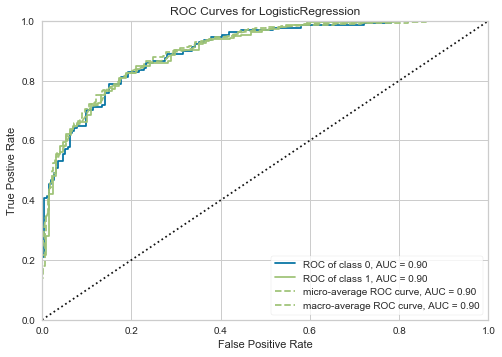

In [130]:
#check some cool plots
base_model(estimator='lr', plot='auc')

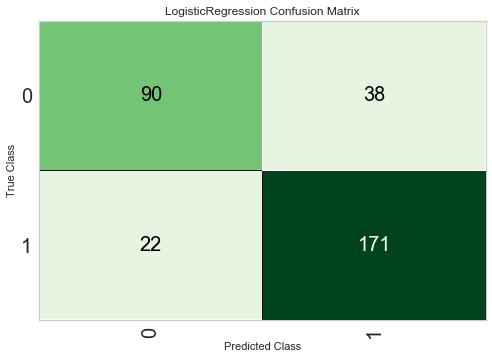

In [131]:
base_model(estimator='lr', plot='confusion_matrix')

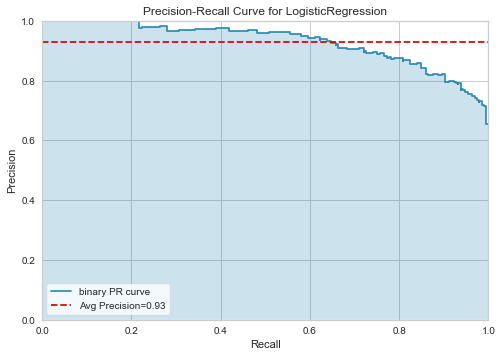

In [132]:
base_model(estimator='lr', plot='pr')

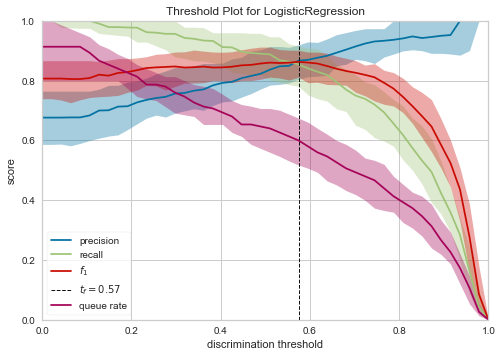

In [135]:
base_model(estimator='lr',plot='threshold')

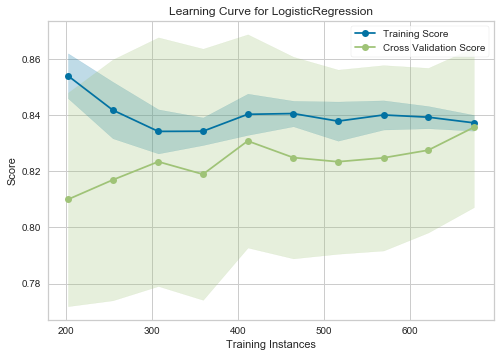

In [136]:
base_model(estimator='lr',plot='learning')

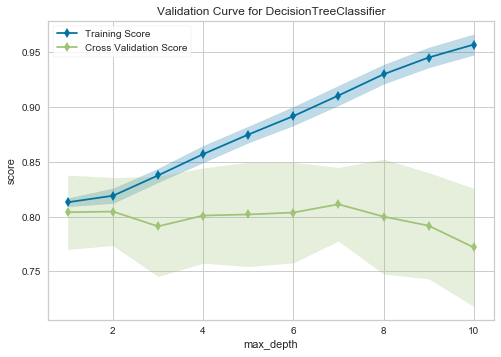

In [139]:
base_model(estimator='dt', plot='vc') #doesn't run on custom models. Only available for DT now.

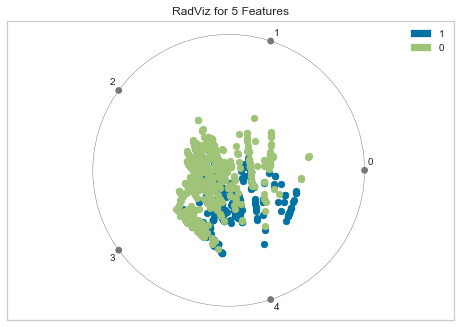

In [140]:
base_model(estimator='lr', plot='dimension') #Doesn't matter which model you use.

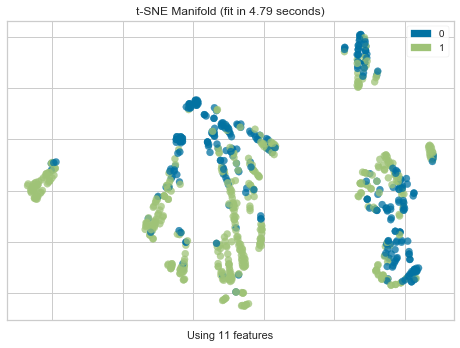

In [141]:
base_model(estimator='lr', plot='manifold') #Doesn't matter which model you use.

C:\Users\mali085\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=DeprecationWarning)


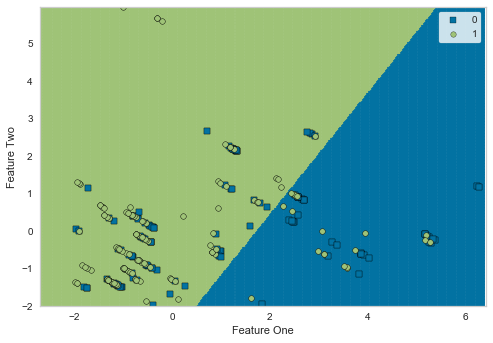

In [142]:
base_model(estimator='lr',plot='boundary') #deprecation warning to be turned off

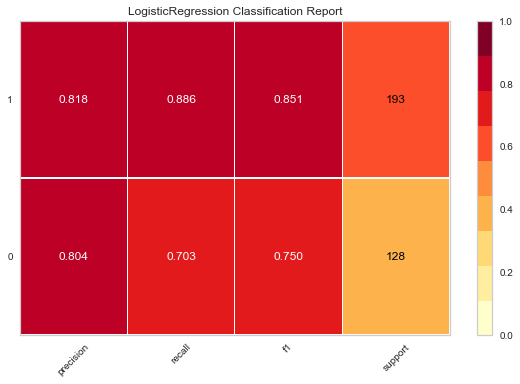

In [143]:
base_model(estimator='lr', plot='class_report')

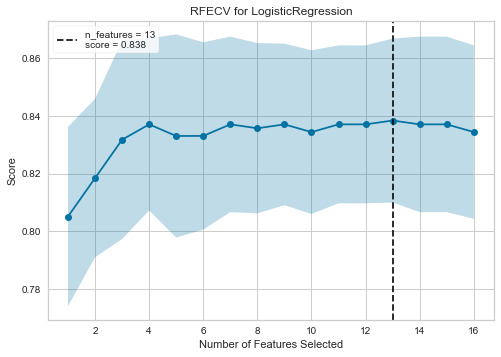

In [144]:
base_model(estimator='lr',plot='rfe') #takes some time in generating the plot

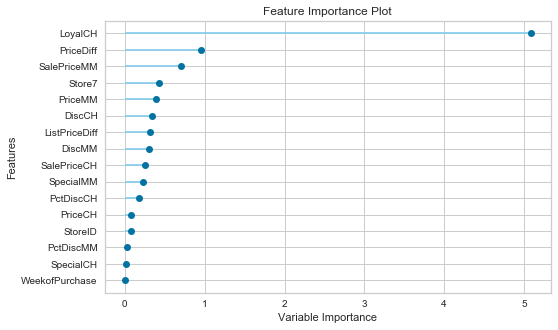

In [145]:
base_model(estimator='lr',plot='feature')

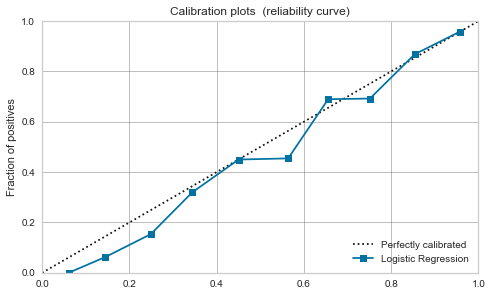

In [146]:
base_model(estimator='lr', plot='calibration')

## 2.0. compare_models 

In [149]:
#Lets check all the models without tuning and without ensembling
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Support Vector Machine - Linear,0.8384,0.8969,0.8848,0.9303,0.8707,0.6551
1,Logistic Regression,0.8344,0.8985,0.8891,0.9312,0.8684,0.6453
2,Neural Net - Multi Level Perceptron,0.8131,0.8863,0.85,0.921,0.8465,0.6059
3,Gaussian Naive Bayes,0.7624,0.8232,0.7565,0.8672,0.7948,0.5138
4,Decision Tree,0.757,0.7482,0.7957,0.7717,0.8007,0.4891
5,Support Vector Machine - RBF,0.733,0.8166,0.8826,0.8786,0.8026,0.3991
6,Gaussian Process Classifier,0.7291,0.7822,0.837,0.8475,0.7913,0.4067
7,K Nearest Neighbours,0.7277,0.7719,0.8043,0.8064,0.7835,0.416


In [152]:
#Lets check all the models without tuning and with Bagging
compare_models(ensemble=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.8357,0.8989,0.887,0.9313,0.8689,0.649
1,Support Vector Machine - Linear,0.8304,0.8973,0.8891,0.9307,0.8655,0.6363
2,Neural Net - Multi Level Perceptron,0.8198,0.8924,0.9,0.9265,0.8599,0.6084
3,Decision Tree,0.8023,0.8562,0.8304,0.8779,0.8369,0.5858
4,Gaussian Naive Bayes,0.7637,0.8312,0.7609,0.8778,0.7967,0.5158
5,Support Vector Machine - RBF,0.741,0.809,0.8761,0.869,0.8061,0.4225
6,Gaussian Process Classifier,0.7277,0.7697,0.837,0.8355,0.7902,0.4041
7,K Nearest Neighbours,0.7264,0.7657,0.813,0.8175,0.7846,0.4095


In [154]:
#Lets check all the models without tuning and with Boosting - investigate warnings
compare_models(ensemble=True, method='Boosting')

C:\Users\mali085\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mali085\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.8264,0.8909,0.9022,0.9249,0.8647,0.6237
1,Decision Tree,0.8224,0.8912,0.8609,0.9251,0.8561,0.6238
2,Neural Net - Multi Level Perceptron,0.797,0.8852,0.8935,0.9203,0.8442,0.5511
3,Gaussian Process Classifier,0.7291,0.7822,0.837,0.8475,0.7913,0.4067
4,K Nearest Neighbours,0.7277,0.7719,0.8043,0.8064,0.7835,0.416
5,Support Vector Machine - Linear,0.6142,0.7232,0.7674,0.823,0.7048,0.1376
6,Support Vector Machine - RBF,0.6142,0.7638,1,0.8481,0.761,0
7,Gaussian Naive Bayes,0.5368,0.5841,0.6304,0.7025,0.5394,0.0186


## 3.0. tune_model

In [167]:
#Let's tune Logistic Regression with ensembling (Bagging)
tune_model(estimator='lr', ensemble=True)
tuned_lr = best_model

In [160]:
#Let's tune Logistic Regression without ensembling
tune_model(estimator='mlp')
tuned_mlp = best_model

In [162]:
#Let's tune decision tree with ensembling (Boosting)
tune_model(estimator='dt', ensemble=True, method='Boosting')
tuned_dt = best_model

In [165]:
tune_model(estimator='svm')
tuned_svm = best_model

EXCEPTION RAISED: Linear SVM tuning is not supported. The results generated below are using default parameters of SVM.


# 4.0. stack_models

In [168]:
#create a model library from tuned models
model_lib = [tuned_lr, tuned_mlp, tuned_dt, tuned_svm]

In [170]:
#stack tuned models without restacking
stack_models(model_lib)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8533,0.9010,0.9348,0.9321,0.8866,0.6806
1,0.8400,0.8921,0.8696,0.9225,0.8696,0.6627
2,0.7600,0.8613,0.8696,0.8974,0.8163,0.4739
3,0.8800,0.9460,0.9348,0.9697,0.9053,0.7421
4,0.8133,0.8426,0.8696,0.8800,0.8511,0.6014
5,0.8667,0.9505,0.9348,0.9703,0.8958,0.7115
6,0.8933,0.9295,0.8696,0.9545,0.9091,0.7807
7,0.7733,0.8538,0.8043,0.8940,0.8132,0.5251
8,0.8533,0.8913,0.8696,0.9277,0.8791,0.6927
9,0.7838,0.8781,0.8696,0.9111,0.8333,0.5272


In [171]:
#stack tuned models with restacking
stack_models(model_lib, restack=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8400,0.9010,0.9130,0.9326,0.8750,0.6538
1,0.8133,0.8958,0.8478,0.9285,0.8478,0.6064
2,0.7733,0.8628,0.8478,0.9142,0.8211,0.5128
3,0.8267,0.9378,0.9348,0.9670,0.8687,0.6175
4,0.7867,0.8381,0.8478,0.8835,0.8298,0.5444
5,0.8933,0.9498,0.9348,0.9702,0.9149,0.7722
6,0.8667,0.9303,0.8696,0.9517,0.8889,0.7224
7,0.7733,0.8576,0.8478,0.8967,0.8211,0.5128
8,0.8400,0.8861,0.8696,0.9220,0.8696,0.6627
9,0.7973,0.8866,0.8696,0.9131,0.8421,0.5599
